## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
train_df = pd.read_csv('city_day.csv')
print("Train Dataset:")
display(train_df.head())

Train Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
train_df.shape
train_df.dtypes
train_df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


## Data cleaning

In [9]:
mean=train_df['PM2.5'].mean()
mean=int(mean)
train_df['PM2.5']=train_df['PM2.5'].fillna(mean)

In [10]:
mean=train_df['PM10'].mean()
mean=int(mean)
train_df['PM10'] = train_df['PM10'].fillna(mean)

In [11]:
mean=train_df['NO'].mean()
mean=int(mean)
train_df['NO'] = train_df['NO'].fillna(mean)

In [12]:
mean=train_df['NO2'].mean()
mean=int(mean)
train_df['NO2'] = train_df['NO2'].fillna(mean)

In [13]:
mean=train_df['CO'].mean()
mean=int(mean)
train_df['CO'] = train_df['CO'].fillna(mean)

In [14]:
mean=train_df['SO2'].mean()
mean=int(mean)
train_df['SO2'] = train_df['SO2'].fillna(mean)

In [15]:
mean=train_df['O3'].mean()
mean=int(mean)
train_df['O3'] = train_df['O3'].fillna(mean)

In [16]:
mean=train_df['AQI'].mean()
mean=int(mean)
train_df['AQI'] = train_df['AQI'].fillna(mean)

In [17]:
train_df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,4185
NH3,10328
CO,0
SO2,0


In [18]:
train_df=train_df.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
train_df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [19]:
train_df.head(10)

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.0,118.0,0.92,18.22,0.92,27.64,133.36,166.0
1,67.0,118.0,0.97,15.69,0.97,24.55,34.06,166.0
2,67.0,118.0,17.40,19.30,17.40,29.07,30.70,166.0
3,67.0,118.0,1.70,18.48,1.70,18.59,36.08,166.0
4,67.0,118.0,22.10,21.42,22.10,39.33,39.31,166.0
5,67.0,118.0,45.41,38.48,45.41,45.76,46.51,166.0
6,67.0,118.0,112.16,40.62,112.16,32.28,33.47,166.0
7,67.0,118.0,80.87,36.74,80.87,38.54,31.89,166.0
8,67.0,118.0,29.16,31.00,29.16,58.68,25.75,166.0
9,67.0,118.0,17.00,7.04,2.00,8.29,4.55,166.0


In [20]:
prepareddata=train_df.astype(int)
prepareddata.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [21]:
prepareddata.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


## Data visualization

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

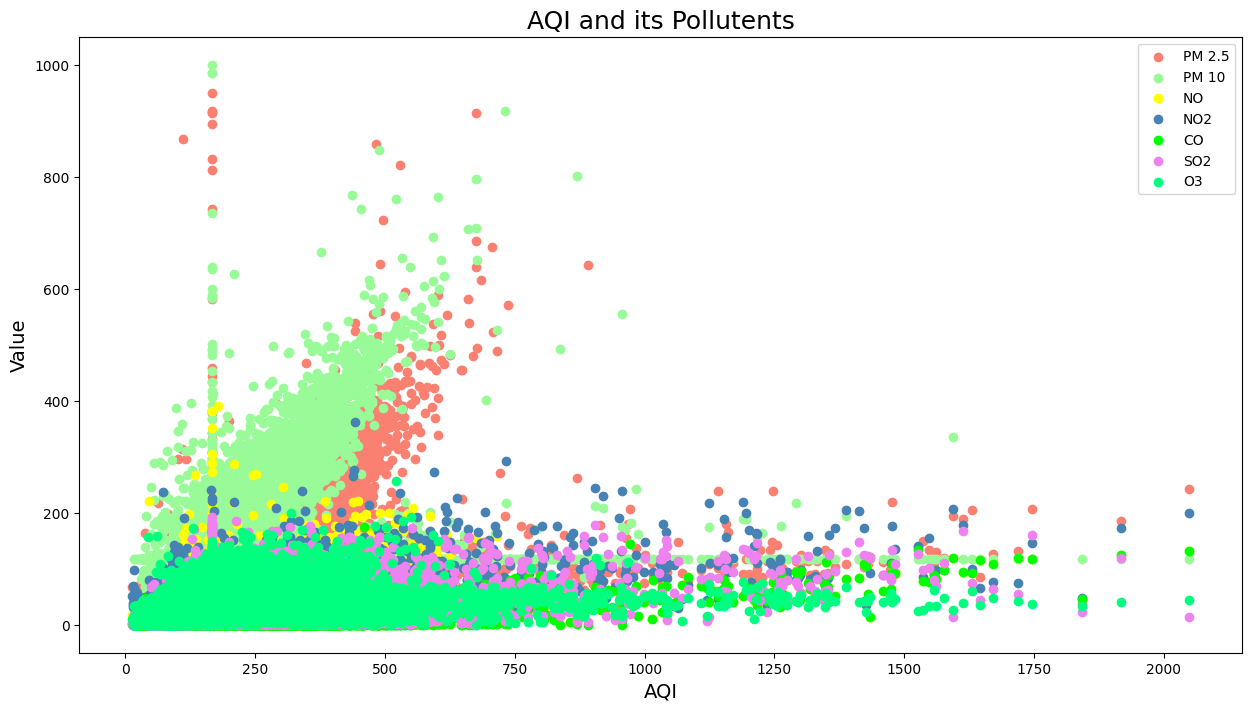

In [23]:
x=prepareddata['AQI']
y1=prepareddata['PM2.5']
y2=prepareddata['PM10']
y3=prepareddata['NO']
y4=prepareddata['NO2']
y5=prepareddata['CO']
y6=prepareddata['SO2']
y7=prepareddata['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

<Axes: >

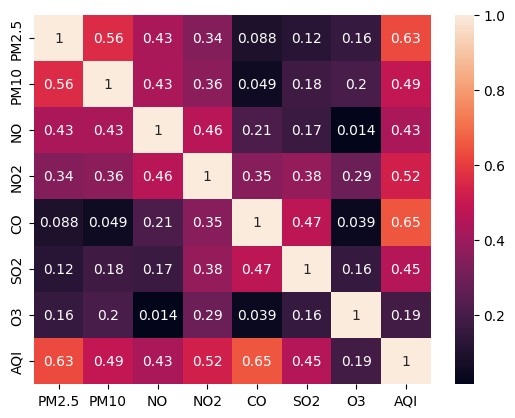

In [24]:
corr = prepareddata.corr()
sns.heatmap(corr, annot=True)

## Data training

In [25]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have our target i.e. Air Quality Index(AQI).
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]
y=prepareddata['AQI']


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Model Creation

### Linear Regression Model

In [56]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
# Fitting data into the model.
reg1.fit(x_train, y_train)
# Making predictions
pred1 = reg1.predict(x_test)
print("Accuracy of the LinearRegression model comes to be: \n ")
print(reg1.score(x_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.7883602687353455


In [58]:
#Random forset regression
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
reg_rf = RandomForestRegressor()
# Fit the model to training data
reg_rf.fit(x_train, y_train)
pred2 = reg_rf.predict(x_test)
print("Accuracy of the Random forest model")
print(reg_rf.score(x_train, y_train))

Accuracy of the Random forest model
0.9804941718503654


In [59]:
#XGboost Algorithim
from xgboost import XGBRegressor
# Instantiate the model
reg_xgb = XGBRegressor()
# Fit the model to training data
reg_xgb.fit(x_train, y_train)
pred3 = reg_xgb.predict(x_test)
print("Accuracy of the XGBoost model")
print(reg_xgb.score(x_train, y_train))

Accuracy of the XGBoost model
0.9590527415275574


In [60]:
#Implementing ada boost
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
reg_ada = AdaBoostRegressor()
# Fit the model to training data
reg_ada.fit(x_train, y_train)
pred4 = reg_ada.predict(x_test)
print("Accuracy of AdaBoost regressor")
print(reg_ada.score(x_train, y_train))

Accuracy of AdaBoost regressor
0.46823749892408095


In [61]:
#implementing stacking regression model
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('rf', RandomForestRegressor()),
    ('xgb', XGBRegressor()),
    ('ada', AdaBoostRegressor())
]

# Instantiate the stacking model
reg_stacking = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
# Fit the model to training data
reg_stacking.fit(x_train, y_train)
pred5 = reg_stacking.predict(x_test)
print(reg_stacking.score(x_train,y_train))

0.9774129191268484


## Performance Evaluation

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t MeanSquareError \t\t Accuracy of the model")
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(RMSE(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Random Forest          \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(RMSE(y_test, pred2)), reg_rf.score(x_train,y_train)))
print("""XGBoost Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(RMSE(y_test, pred3)), reg_xgb.score(x_train,y_train)))
print("""Ada boost Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg_ada.score(x_train,y_train)))
print("""stacking Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg_stacking.score(x_train,y_train)))

Model			 MeanSquareError 		 Accuracy of the model
Linear Regression 		 55.3237 	 		 0.7884
Random Forest          		 43.8954 	 		 0.9805
XGBoost Regression 		 44.4972 	 		 0.9591
Ada boost Regressor		 95.6177 	 		 0.4682
stacking Regressor		 95.6177 	 		 0.9774


In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import check_array

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    y_true = np.array(y_true).reshape(-1, 1)  # Ensure 2D
    y_pred = np.array(y_pred).reshape(-1, 1)  # Ensure 2D
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * np.abs(error) - 0.5 * delta**2
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Output header
print("Model\t\t\t RMSE \t\t MSE \t\t R2 \t\t\t MAPE \t\t Huber Loss")
print("---------------------------------------------------------------------------")

# Calculate metrics for each model
models = [
    ("Linear Regression", pred1, reg1),
    ("Random Forest", pred2, reg_rf),
    ("XGBoost", pred3, reg_xgb),
    ("AdaBoost", pred4, reg_ada),
    ("Stacking", pred4, reg_stacking)  # Assuming pred4 is reused for stacking
]

for name, preds, reg in models:
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)
    huber = huber_loss(y_test, preds)
    print(f"{name:20}\t {rmse:.4f} \t {mse:.4f} \t {r2:.4f} \t {mape:.4f} \t {huber:.4f}")


Model			 RMSE 		 MSE 		 R2 			 MAPE 		 Huber Loss
---------------------------------------------------------------------------
Linear Regression   	 55.3237 	 3060.7076 	 0.8144 	 22.5111 	 30.8406
Random Forest       	 43.8954 	 1926.8038 	 0.8832 	 15.1527 	 21.2425
XGBoost             	 44.4972 	 1980.0028 	 0.8800 	 15.4842 	 21.9531
AdaBoost            	 95.6177 	 9142.7363 	 0.4457 	 77.9228 	 79.9684
Stacking            	 95.6177 	 9142.7363 	 0.4457 	 77.9228 	 79.9684


Linear Regression   	 55.3237 	 3060.7076 	 0.8144 	 22.5111 	 30.8406
Random Forest       	 43.8954 	 1926.8038 	 0.8832 	 15.1527 	 21.2425
XGBoost             	 44.4972 	 1980.0028 	 0.8800 	 15.4842 	 21.9531
AdaBoost            	 95.6177 	 9142.7363 	 0.4457 	 77.9228 	 79.9684
Stacking            	 43.1164 	 1859.0201 	 0.8873 	 14.9198 	 21.3203


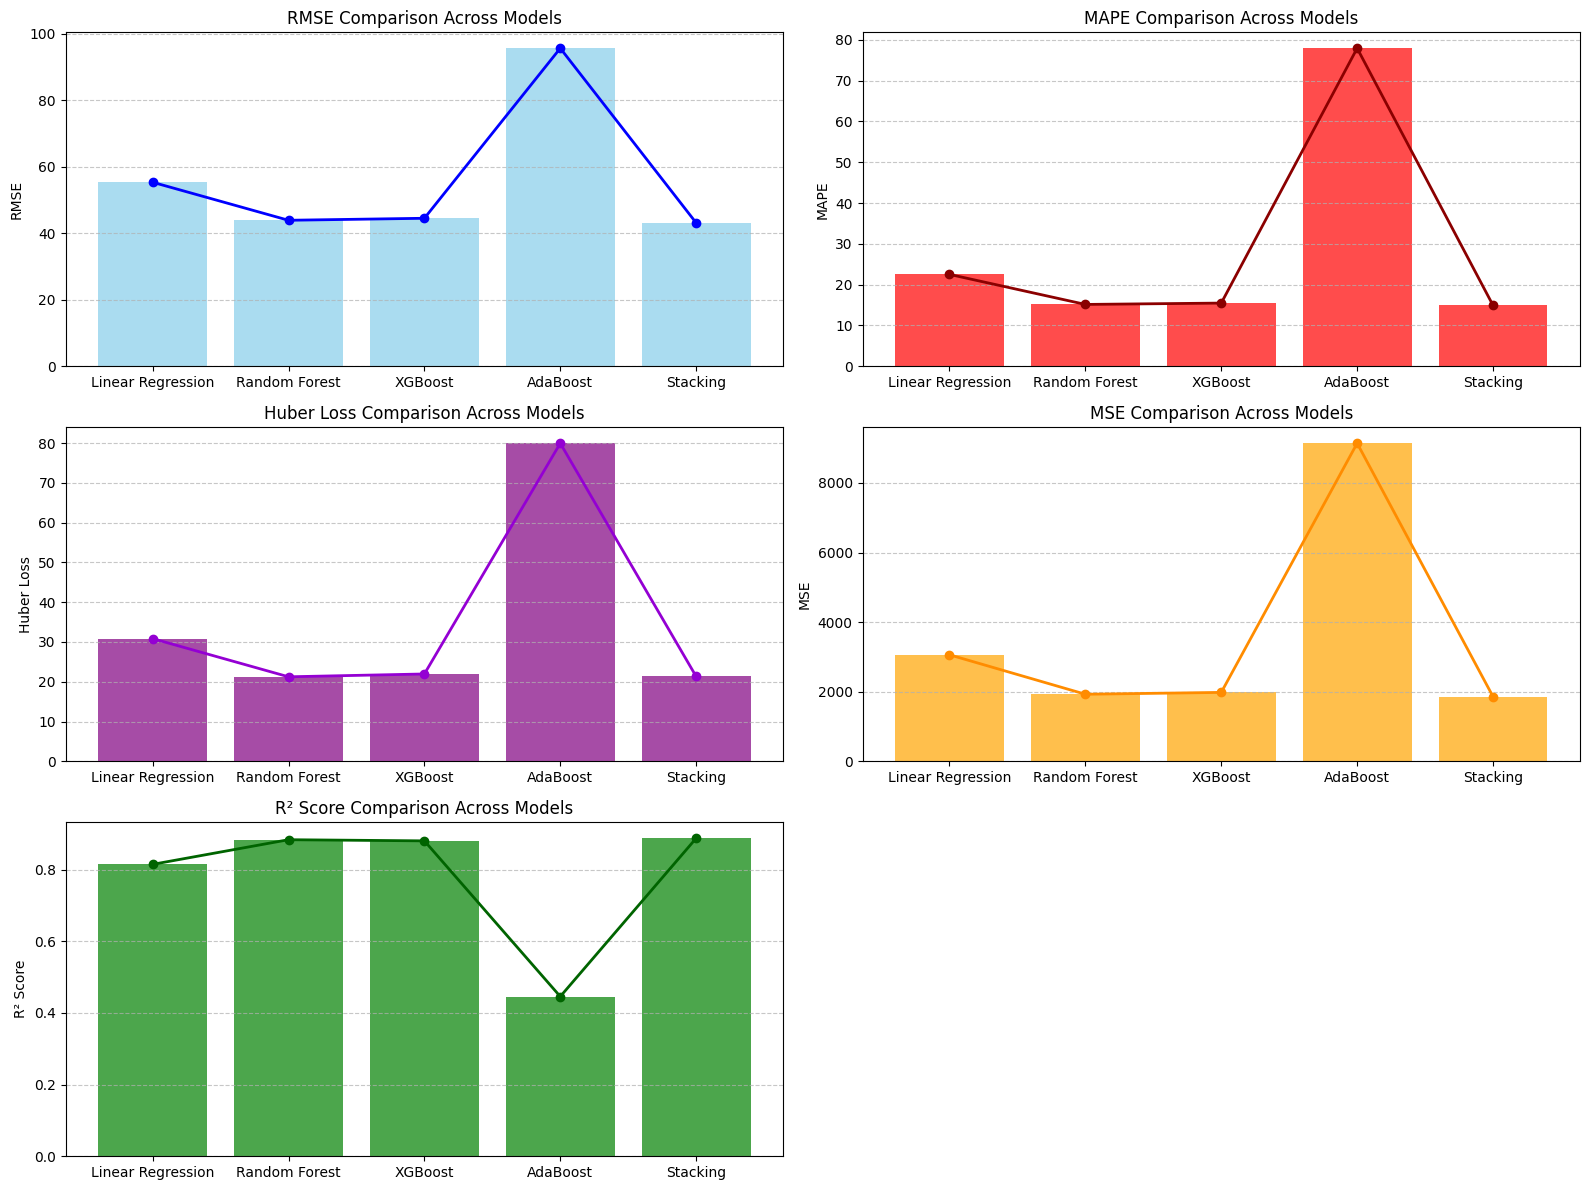

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    y_true = np.array(y_true).reshape(-1, 1)  # Ensure 2D
    y_pred = np.array(y_pred).reshape(-1, 1)  # Ensure 2D
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * np.abs(error) - 0.5 * delta**2
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Models and their predictions
models = [
    ("Linear Regression", pred1, reg1),
    ("Random Forest", pred2, reg_rf),
    ("XGBoost", pred3, reg_xgb),
    ("AdaBoost", pred4, reg_ada),
    ("Stacking", pred5, reg_stacking)  # Assuming pred5 for stacking
]

# Metric lists for plotting
rmse_list = []
mse_list = []
r2_list = []
mape_list = []
huber_list = []
model_names = []

# Calculate metrics for each model
for name, preds, reg in models:
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)
    huber = huber_loss(y_test, preds)

    rmse_list.append(rmse)
    mse_list.append(mse)
    r2_list.append(r2)
    mape_list.append(mape)
    huber_list.append(huber)
    model_names.append(name)

    print(f"{name:20}\t {rmse:.4f} \t {mse:.4f} \t {r2:.4f} \t {mape:.4f} \t {huber:.4f}")

# Create a subplot figure
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

# Plot RMSE, MAPE, Huber Loss
axs[0, 0].bar(model_names, rmse_list, color='skyblue', alpha=0.7, label='RMSE')
axs[0, 0].plot(model_names, rmse_list, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
axs[0, 0].set_title('RMSE Comparison Across Models')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

axs[0, 1].bar(model_names, mape_list, color='red', alpha=0.7, label='MAPE')
axs[0, 1].plot(model_names, mape_list, color='darkred', marker='o', linestyle='-', linewidth=2, markersize=6)
axs[0, 1].set_title('MAPE Comparison Across Models')
axs[0, 1].set_ylabel('MAPE')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

axs[1, 0].bar(model_names, huber_list, color='purple', alpha=0.7, label='Huber Loss')
axs[1, 0].plot(model_names, huber_list, color='darkviolet', marker='o', linestyle='-', linewidth=2, markersize=6)
axs[1, 0].set_title('Huber Loss Comparison Across Models')
axs[1, 0].set_ylabel('Huber Loss')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot MSE and R² Score
axs[1, 1].bar(model_names, mse_list, color='orange', alpha=0.7, label='MSE')
axs[1, 1].plot(model_names, mse_list, color='darkorange', marker='o', linestyle='-', linewidth=2, markersize=6)
axs[1, 1].set_title('MSE Comparison Across Models')
axs[1, 1].set_ylabel('MSE')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

axs[2, 0].bar(model_names, r2_list, color='green', alpha=0.7, label='R² Score')
axs[2, 0].plot(model_names, r2_list, color='darkgreen', marker='o', linestyle='-', linewidth=2, markersize=6)
axs[2, 0].set_title('R² Score Comparison Across Models')
axs[2, 0].set_ylabel('R² Score')
axs[2, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the empty subplot (last one)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
